In [82]:

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics 
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import kurtosis, skew
import statsmodels.api as sm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from pylab import rcParams
import sklearn
from sklearn.cluster import KMeans 
from sklearn.preprocessing import scale # for scaling the data
import sklearn.metrics as sm # for evaluating the model
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report

warnings.filterwarnings('ignore')

In [83]:
# data link: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers
data =pd.read_csv("Wholesale customers data.csv")

In [84]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [85]:
# we will cluster the channle of the data
# 4. Number of instances
# determining the dimension of the data (number of instances)
print("The dimension of the data",data.shape)
print("THe number of instances ", data.shape[0])


The dimension of the data (440, 8)
THe number of instances  440


In [86]:
#5 Displaying the number of attributes
print ("The number of attributes ", data.shape[1])

The number of attributes  8


In [87]:
# 6. displaying statistical summary
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# 7. Checking data qualities


In [88]:
# checking for missing values
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [10]:
# checking for any duplicates
Rowduplicate = data[data.duplicated()]
print(Rowduplicate)
# no duplocates

Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []


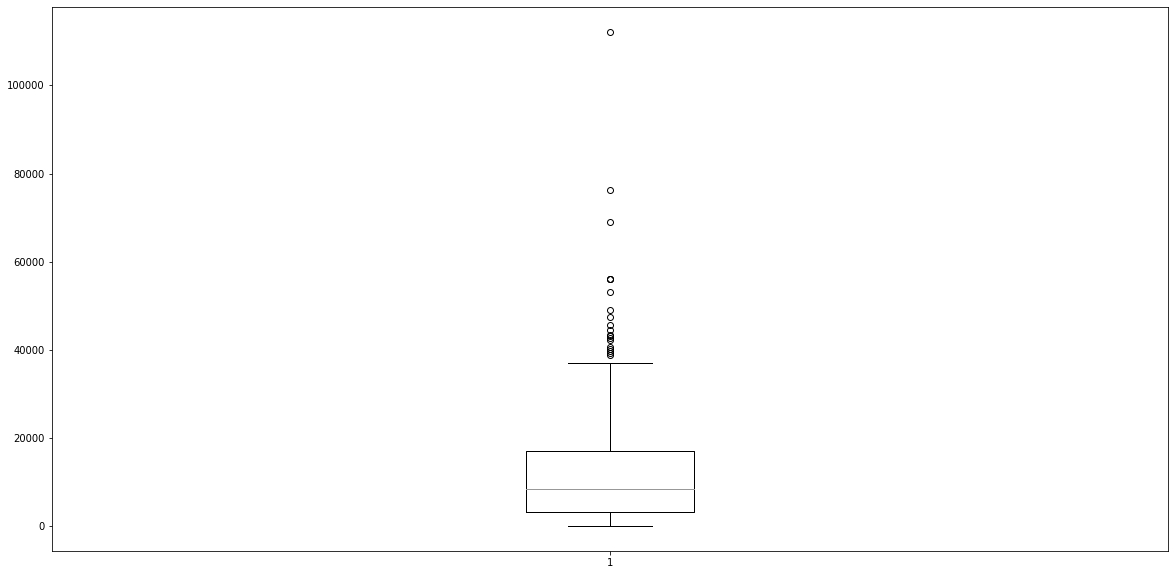

In [92]:
# outliers in Fresh
plt.boxplot(data['Fresh'])

Q1 = data['Fresh'].quantile(0.1)
Q3 = data['Fresh'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['Fresh'] >= Q1 - 1.5*IQR) & 
                      (data['Fresh'] <= Q3 + 1.5*IQR)]

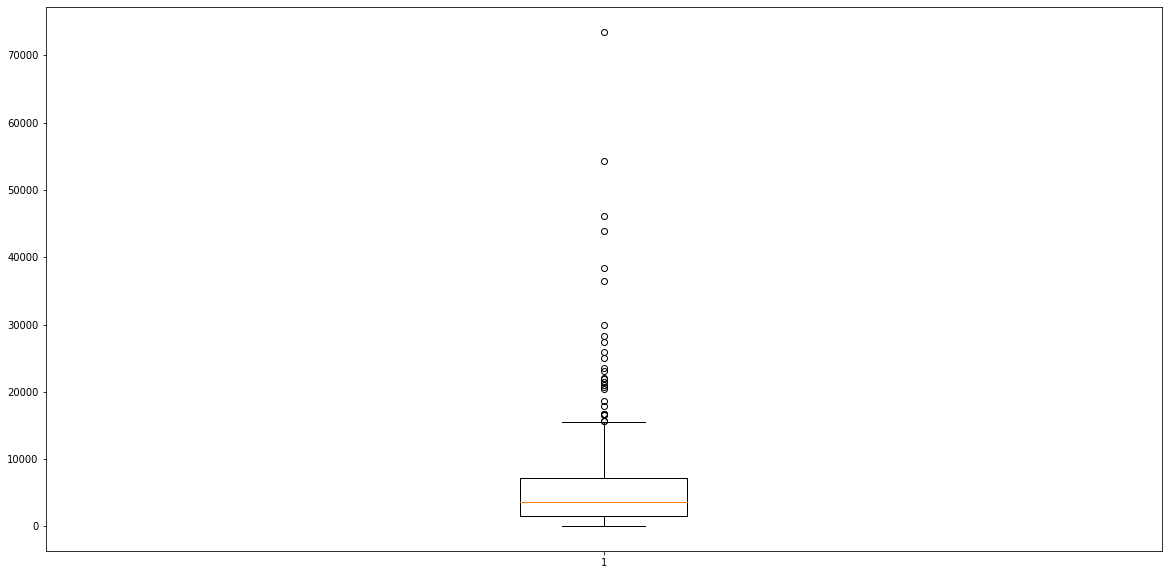

In [95]:
# Milk
plt.boxplot(data['Milk'])

Q1 = data['Milk'].quantile(0.1)
Q3 = data['Milk'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['Milk'] >= Q1 - 1.5*IQR) & 
                      (data['Milk'] <= Q3 + 1.5*IQR)]

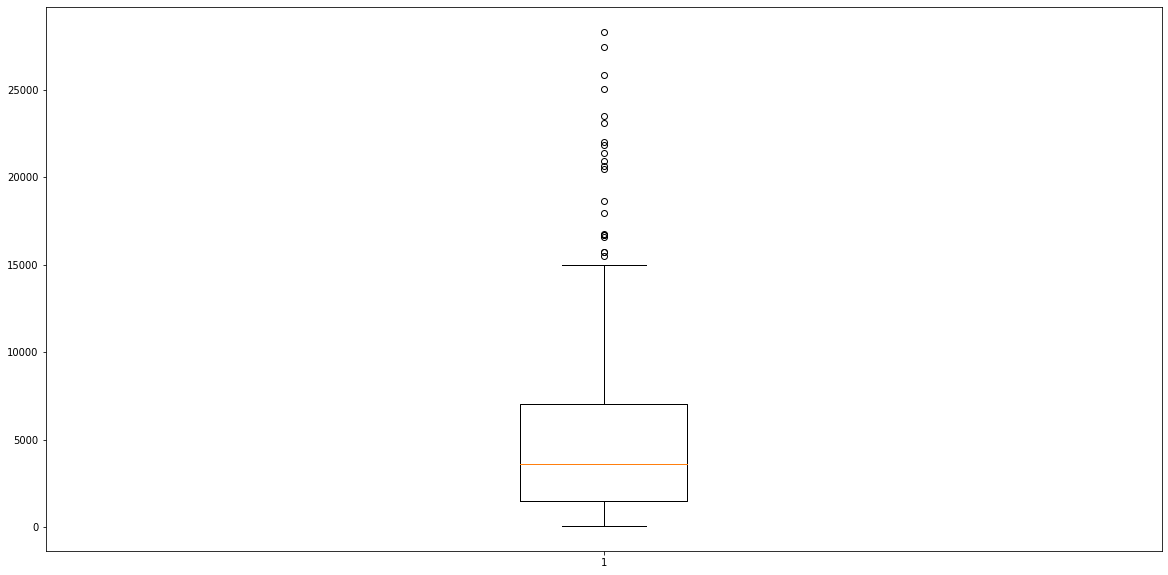

In [96]:
# Milk
plt.boxplot(data['Milk'])

Q1 = data['Milk'].quantile(0.1)
Q3 = data['Milk'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['Milk'] >= Q1 - 1.5*IQR) & 
                      (data['Milk'] <= Q3 + 1.5*IQR)]

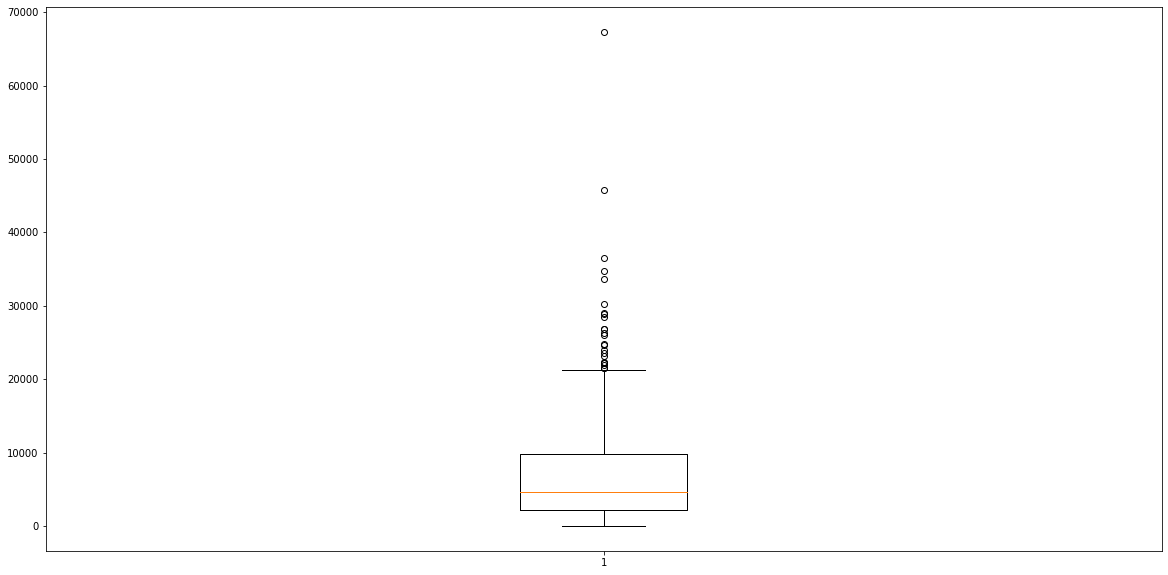

In [97]:
#Grocery
# Grocery
plt.boxplot(data['Grocery'])

Q1 = data['Grocery'].quantile(0.1)
Q3 = data['Grocery'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['Grocery'] >= Q1 - 1.5*IQR) & 
                      (data['Grocery'] <= Q3 + 1.5*IQR)]

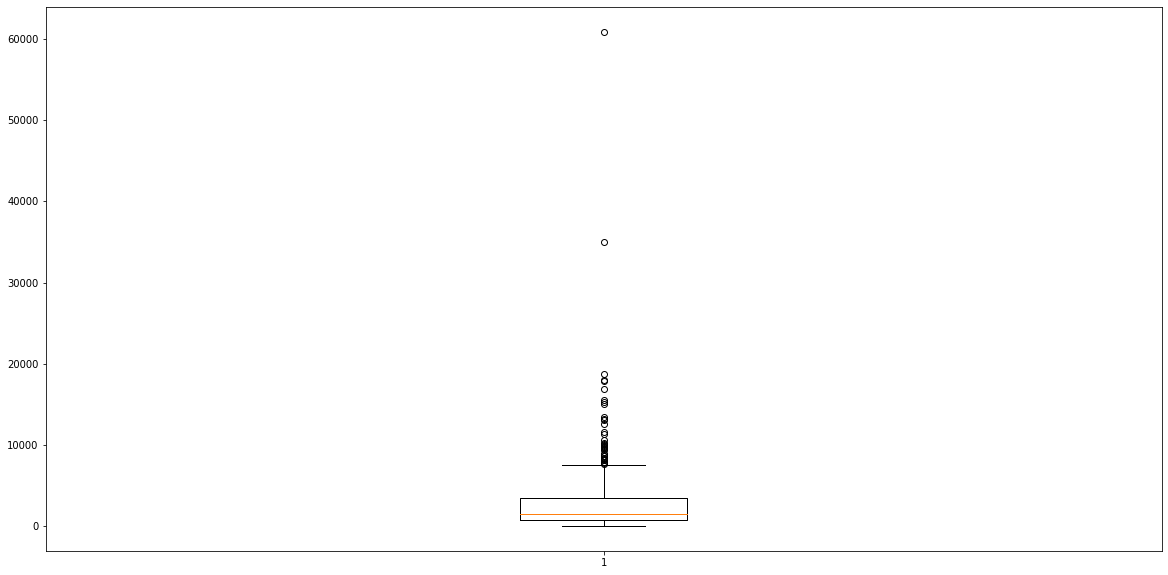

In [98]:
#Frozen
# Frozen
plt.boxplot(data['Frozen'])

Q1 = data['Frozen'].quantile(0.1)
Q3 = data['Frozen'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['Frozen'] >= Q1 - 1.5*IQR) & 
                      (data['Frozen'] <= Q3 + 1.5*IQR)]

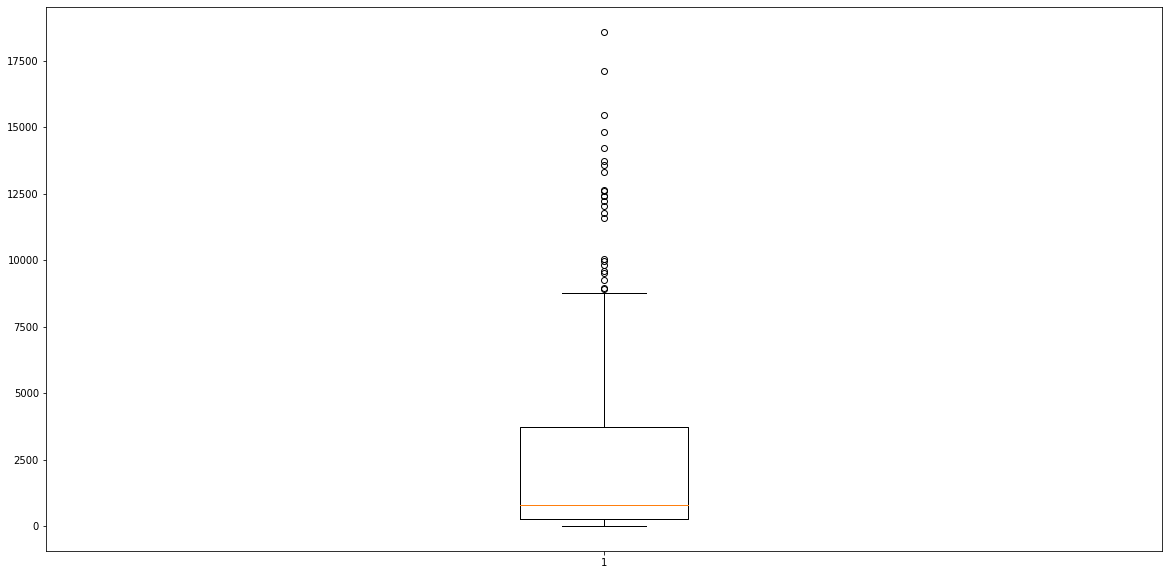

In [99]:
#Detergents_Paper
# Detergents_Paper
plt.boxplot(data['Detergents_Paper'])

Q1 = data['Detergents_Paper'].quantile(0.1)
Q3 = data['Detergents_Paper'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['Detergents_Paper'] >= Q1 - 1.5*IQR) & 
                      (data['Detergents_Paper'] <= Q3 + 1.5*IQR)]

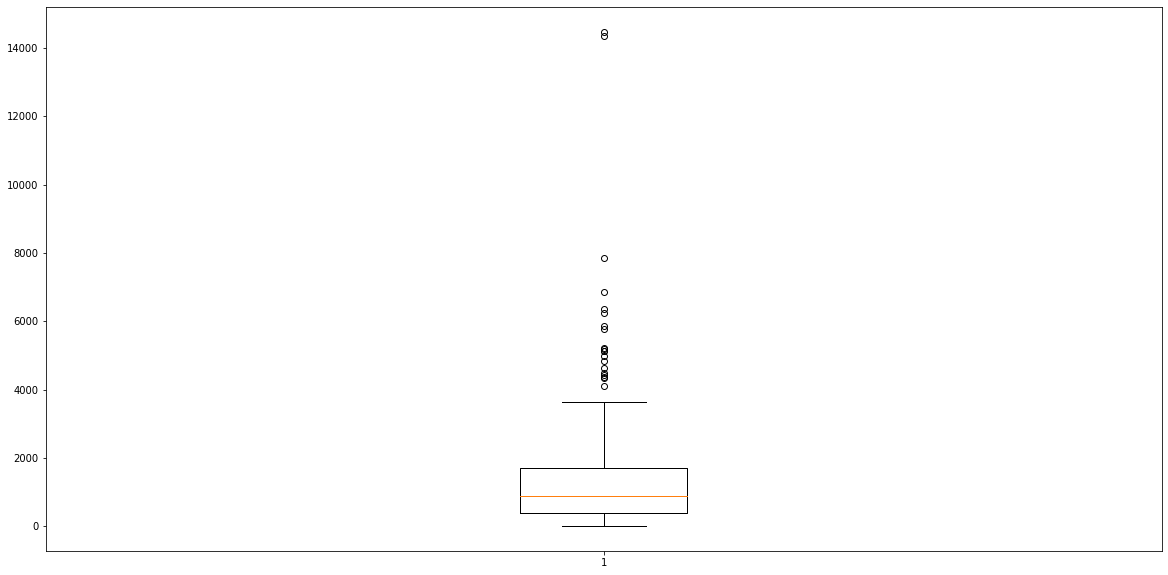

In [100]:
#Delicassen
# Delicassen
plt.boxplot(data['Delicassen'])

Q1 = data['Delicassen'].quantile(0.1)
Q3 = data['Delicassen'].quantile(0.9)
IQR = Q3 - Q1
data = data[(data['Delicassen'] >= Q1 - 1.5*IQR) & 
                      (data['Delicassen'] <= Q3 + 1.5*IQR)]

# APPLYING CLUSTERRING ALGORITHMS

In [49]:
from sklearn.cluster import KMeans

In [50]:
kmeans=KMeans(n_clusters=2)

In [51]:
kmeans.fit(data.drop('Channel',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
kmeans.cluster_centers_

array([[2.52800000e+00, 7.94411200e+03, 5.15181867e+03, 7.53612800e+03,
        2.48413067e+03, 2.87255733e+03, 1.21426133e+03],
       [2.63076923e+00, 3.54013692e+04, 9.51423077e+03, 1.03463692e+04,
        6.46309231e+03, 2.93304615e+03, 3.31684615e+03]])

In [55]:
data.Channel= data["Channel"].astype('category')

In [56]:
# confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(data['Channel'],kmeans.labels_))
print(classification_report(data['Channel'],kmeans.labels_))

[[  0   0   0]
 [247  51   0]
 [128  14   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.78      0.17      0.28       298
           2       0.00      0.00      0.00       142

    accuracy                           0.12       440
   macro avg       0.26      0.06      0.09       440
weighted avg       0.53      0.12      0.19       440



In [57]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


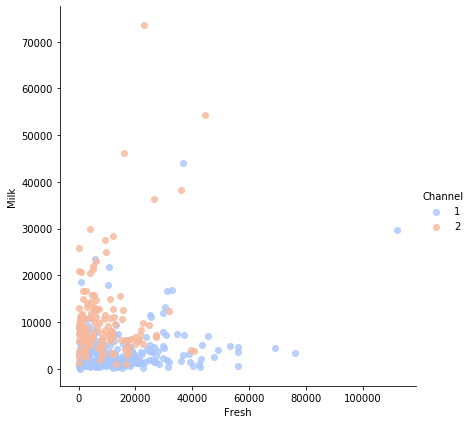

In [58]:
# sns.set_style('whitegrid')
sns.lmplot('Fresh','Milk',data=data, hue='Channel',
           palette='coolwarm',size=6,aspect=1,fit_reg=False)

In [ ]:
# Hierachial clusterring 

In [64]:
X = data.iloc[:, 1:8].values

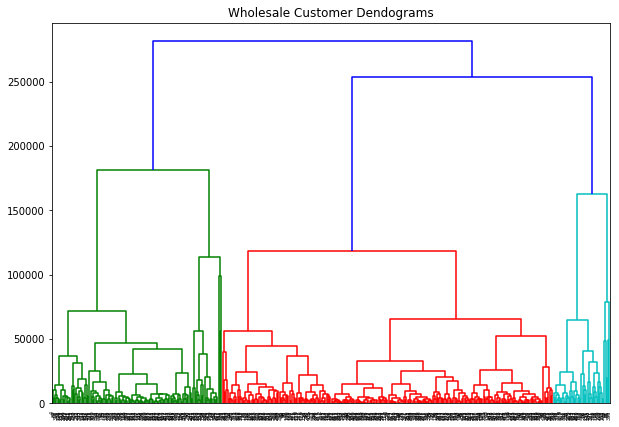

In [67]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Wholesale Customer Dendograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))

In [70]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
pred=cluster.fit_predict(X)
pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

# DBSCAN

In [73]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

Text(0.5, 0, 'Groceries')

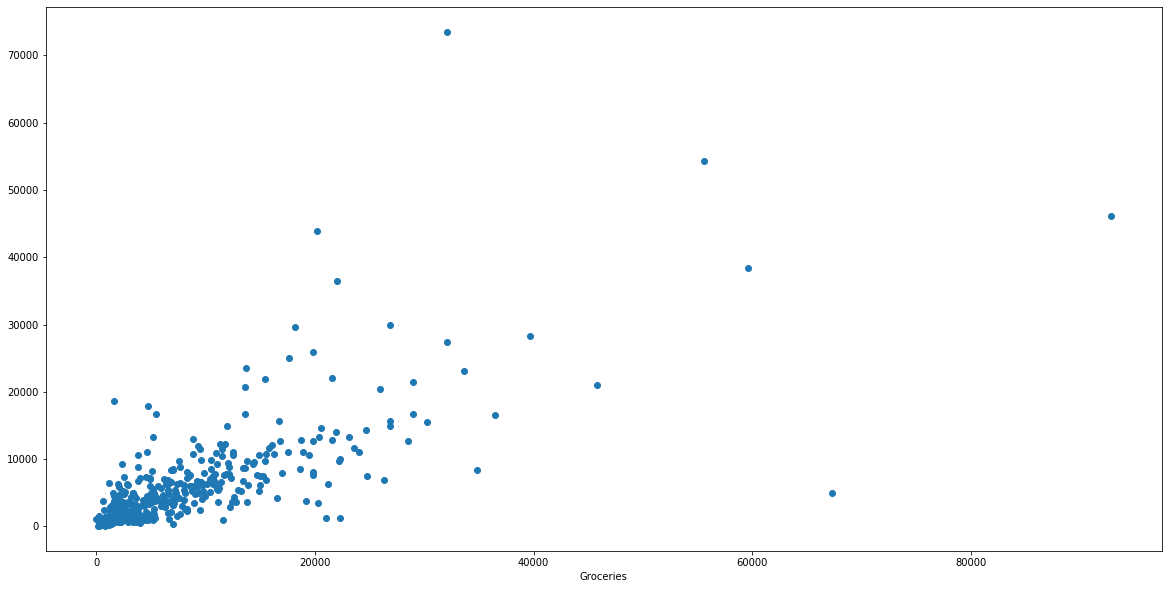

In [78]:
# Let's plot the data now
x = data['Grocery']
y = data['Milk']

plt.scatter(x,y)
plt.xlabel("Groceries")

In [79]:
df = data[["Grocery", "Milk"]]
df = df.as_matrix().astype("float32", copy = False)
stscaler = StandardScaler().fit(df)
df = stscaler.transform(df)

In [80]:
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(df)

In [81]:
labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype = bool)
core_samples[dbsc.core_sample_indices_] = True